<div style="background-color:#f0f8ff; padding:10px; border-radius:10px;">
  <h1 style="text-align:center; color:#1a5276;">
    📈 AMZN Analysis
  </h1>
</div>

In [15]:
#auto loading
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import warnings

## 🧱 1. Setup & Imports

In [17]:
import pandas as pd
from utils.ticker_analyzer import TickerAnalyzer
from eda.data_quality_utils import DataQualityUtils
from data.load_data import load_local_data

In [ ]:
# variables
TICKER= 'AAPL'
RAW_DATA_PATH='../../data/raw/yfinance_data/AMZN_historical_data.csv'
CLEANED_DATA_PATH='../../data/interim/AMZN_historical_cleaned_data.csv'

### 📌 Project Overview

#### AAPL Ticker Analysis 📊

**Objective:**  
This notebook applies the `TickerAnalyzer` class to analyze Apple Inc. (AAPL) stock performance. The analysis integrates:

- Historical price data via `yfinance`
- Technical indicators using `ta`
- News sentiment analysis with `VADER`
- Visualization of price movements vs. sentiment trends

**Period:** Last 6 months (daily intervals)  
**Tools:** Python, `yfinance`, `ta`, `vaderSentiment`, `matplotlib`

---


## 📦 2. Data Loading & Overview  <a id= '2-data-loading--overview'></a>

In [19]:
# Load the stock news sentiment data
df = load_local_data(RAW_DATA_PATH,)
df.head()

INFO:data.load_data:Loading data from: /home/teshager/Documents/10Academy/repositories/projects/financial-news-sentiment-analysis/data/raw/yfinance_data/AMZN_historical_data.csv (type=csv)
INFO:data.load_data:Data loaded successfully. Shape: (6846, 9)


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0


### Dataset Overview

In [20]:
#view sample data
df.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
2177,2006-01-10,2.320500,2.337500,2.268000,2.282500,2.282500,193722000,0.0,0.0
3029,2009-06-01,3.910500,4.240000,3.874500,4.152500,4.152500,215930000,0.0,0.0
5596,2019-08-12,89.799500,90.049004,88.849998,89.246002,89.246002,58110000,0.0,0.0
6090,2021-07-28,181.688995,182.921005,180.050003,181.516006,181.516006,59988000,0.0,0.0
3616,2011-09-27,11.711000,11.737500,11.120000,11.210500,11.210500,156750000,0.0,0.0
1363,2002-10-16,0.913500,0.983000,0.912500,0.974500,0.974500,174842000,0.0,0.0
1996,2005-04-22,1.674500,1.681500,1.645500,1.652000,1.652000,127840000,0.0,0.0
678,2000-01-24,3.378125,3.668750,3.375000,3.506250,3.506250,583404000,0.0,0.0
351,1998-10-06,0.929167,0.935417,0.866667,0.902604,0.902604,563436000,0.0,0.0
5797,2020-05-29,120.796997,122.118500,119.910004,122.118500,122.118500,70198000,0.0,0.0


In [21]:
#see the last rows
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
6841,2024-07-24,183.199997,185.449997,180.410004,180.830002,180.830002,41532400,0.0,0.0
6842,2024-07-25,182.910004,183.899994,176.800003,179.850006,179.850006,44464200,0.0,0.0
6843,2024-07-26,180.389999,183.190002,180.240005,182.500000,182.500000,29506000,0.0,0.0
6844,2024-07-29,183.839996,184.750000,182.380005,183.199997,183.199997,33270100,0.0,0.0
6845,2024-07-30,184.720001,185.860001,179.380005,181.710007,181.710007,39508600,0.0,0.0


In [22]:
#shape of the dataset
df.shape

(6846, 9)

In [23]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')

## 📐 3. Data Types & Basic Stats <a id='3-data-types--basic-stats'></a>

In [24]:
#Numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,6846.0,3.736046e+01,5.375695e+01,7.031300e-02,2.070125e+00,8.574500e+00,5.045388e+01,2.000900e+02
High,6846.0,3.780101e+01,5.436645e+01,7.239600e-02,2.120625e+00,8.666750e+00,5.072325e+01,2.012000e+02
Low,6846.0,3.688256e+01,5.308705e+01,6.562500e-02,2.040156e+00,8.466500e+00,5.005987e+01,1.990500e+02
Close,6846.0,3.735110e+01,5.372991e+01,6.979200e-02,2.076750e+00,8.591500e+00,5.042650e+01,2.000000e+02
Adj Close,6846.0,3.735110e+01,5.372991e+01,6.979200e-02,2.076750e+00,8.591500e+00,5.042650e+01,2.000000e+02
Volume,6846.0,1.380713e+08,1.382346e+08,9.744000e+06,6.505442e+07,1.020650e+08,1.567560e+08,2.086584e+09
Dividends,6846.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Stock Splits,6846.0,3.943909e-03,2.467890e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01


In [25]:
#for columns of object type
df.describe(include=['O']).T

,count,unique,top,freq
Date,6846,6846,1997-05-15,1


In [26]:
# data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6846 entries, 0 to 6845
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6846 non-null   object 
 1   Open          6846 non-null   float64
 2   High          6846 non-null   float64
 3   Low           6846 non-null   float64
 4   Close         6846 non-null   float64
 5   Adj Close     6846 non-null   float64
 6   Volume        6846 non-null   int64  
 7   Dividends     6846 non-null   float64
 8   Stock Splits  6846 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 481.5+ KB


In [27]:
#distinct values in each column
df.nunique().sort_values(ascending=False)

Date            6846
Volume          6652
Close           6207
Adj Close       6207
Open            6109
Low             6071
High            6066
Stock Splits       4
Dividends          1
dtype: int64

## 🔍 4. Data Quality Analysis <a id='4-data-quality-analysis'></a>

In [28]:
#instantiate the DataQualityUtils class
dq=DataQualityUtils(df)

In [29]:
#count of missing values per column
dq.summary()

,#missing_values,percentage
Date,0,0.00%
Open,0,0.00%
High,0,0.00%
Low,0,0.00%
Close,0,0.00%
Adj Close,0,0.00%
Volume,0,0.00%
Dividends,0,0.00%
Stock Splits,0,0.00%


### Missing Values

In [30]:
#column with >5% nulls
dq.columns_with_significant_missing_values(threshold=5)

,#missing_values,percentage


### Duplicates

In [31]:
#count duplicates
dq.count_duplicates()

0

### Invalid Values

In [32]:
dq.find_invalid_values()

{}

## 🧹 5. Data Cleaning  <a id='5-data-cleaning'></a>

In [33]:
#saving the original dataset for later use
df_original=df.copy()

### Inconsistencies and Inaccuracies

In [34]:
#drop redundancies and clean column names
df=dq.drop_redundant_columns()

In [35]:
df=dq.convert_columns_to_datetime()

[Date] Converted: 6846/6846 (0 became NaT)


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6846 entries, 0 to 6845
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          6846 non-null   datetime64[ns, UTC]
 1   Open          6846 non-null   float64            
 2   High          6846 non-null   float64            
 3   Low           6846 non-null   float64            
 4   Close         6846 non-null   float64            
 5   Adj Close     6846 non-null   float64            
 6   Volume        6846 non-null   int64              
 7   Dividends     6846 non-null   float64            
 8   Stock Splits  6846 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(7), int64(1)
memory usage: 481.5 KB


In [37]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')

In [38]:
df.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
6137,2021-10-04 00:00:00+00:00,163.969498,163.999496,158.812500,159.488998,159.488998,90462000,0.0,0.0
5804,2020-06-09 00:00:00+00:00,126.472000,131.321503,126.250000,130.042999,130.042999,103520000,0.0,0.0
4261,2014-04-23 00:00:00+00:00,16.653000,16.656500,16.169500,16.229000,16.229000,72092000,0.0,0.0
2105,2005-09-27 00:00:00+00:00,2.163000,2.186500,2.141000,2.158000,2.158000,83470000,0.0,0.0
286,1998-07-06 00:00:00+00:00,1.061458,1.172917,1.045833,1.162500,1.162500,937668000,0.0,0.0
2884,2008-10-30 00:00:00+00:00,2.938000,2.994500,2.754000,2.835500,2.835500,222514000,0.0,0.0
4957,2017-01-26 00:00:00+00:00,41.776501,42.192001,41.650002,41.957500,41.957500,71726000,0.0,0.0
2026,2005-06-06 00:00:00+00:00,1.777000,1.801000,1.774000,1.788500,1.788500,77630000,0.0,0.0
2195,2006-02-06 00:00:00+00:00,1.917000,1.917000,1.888500,1.897500,1.897500,170064000,0.0,0.0
64,1997-08-15 00:00:00+00:00,0.106771,0.107813,0.096875,0.105729,0.105729,31944000,0.0,0.0


In [47]:
# Save to csv
df.to_csv(CLEANED_DATA_PATH, index=False)

## 6. Analyze

In [48]:
# Load the ticker analyze
ta = TickerAnalyzer("AAPL")
ta.load_price_data_from_csv(CLEANED_DATA_PATH)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1997-05-15 00:00:00+00:00,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1,1997-05-16 00:00:00+00:00,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
2,1997-05-19 00:00:00+00:00,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
3,1997-05-20 00:00:00+00:00,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21 00:00:00+00:00,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6841,2024-07-24 00:00:00+00:00,183.199997,185.449997,180.410004,180.830002,180.830002,41532400,0.0,0.0
6842,2024-07-25 00:00:00+00:00,182.910004,183.899994,176.800003,179.850006,179.850006,44464200,0.0,0.0
6843,2024-07-26 00:00:00+00:00,180.389999,183.190002,180.240005,182.500000,182.500000,29506000,0.0,0.0
6844,2024-07-29 00:00:00+00:00,183.839996,184.750000,182.380005,183.199997,183.199997,33270100,0.0,0.0


In [49]:
# Instantiate the analyzer for a specific ticker (ticker is mostly for metadata here)
analyzer = TickerAnalyzer(ticker="AAPL", period="1y", interval="1d")

In [50]:
# Load Price Data from CSV
price_df = analyzer.load_price_data_from_csv(CLEANED_DATA_PATH)

print("Price Data Sample:")
print(price_df.head())

Price Data Sample:
                       Date      Open      High       Low     Close  \
0 1997-05-15 00:00:00+00:00  0.121875  0.125000  0.096354  0.097917   
1 1997-05-16 00:00:00+00:00  0.098438  0.098958  0.085417  0.086458   
2 1997-05-19 00:00:00+00:00  0.088021  0.088542  0.081250  0.085417   
3 1997-05-20 00:00:00+00:00  0.086458  0.087500  0.081771  0.081771   
4 1997-05-21 00:00:00+00:00  0.081771  0.082292  0.068750  0.071354   

   Adj Close      Volume  Dividends  Stock Splits  
0   0.097917  1443120000        0.0           0.0  
1   0.086458   294000000        0.0           0.0  
2   0.085417   122136000        0.0           0.0  
3   0.081771   109344000        0.0           0.0  
4   0.071354   377064000        0.0           0.0  


In [51]:
# Add Technical Indicators ===
analyzer.price_df.rename(
    columns={
        'date': 'Date',
        'open': 'Open',
        'high': 'High',
        'low': 'Low',
        'close': 'Close',
        'volume': 'Volume'
    }, inplace=True)
price_with_indicators = analyzer.add_technical_indicators()
print("\nPrice Data with Technical Indicators Sample:")
print(price_with_indicators[['Date', 'Close','momentum_rsi', 'Volume','trend_macd']].head())


Price Data with Technical Indicators Sample:
                       Date     Close  momentum_rsi      Volume  trend_macd
0 1997-05-15 00:00:00+00:00  0.097917           NaN  1443120000         NaN
1 1997-05-16 00:00:00+00:00  0.086458           NaN   294000000         NaN
2 1997-05-19 00:00:00+00:00  0.085417           NaN   122136000         NaN
3 1997-05-20 00:00:00+00:00  0.081771           NaN   109344000         NaN
4 1997-05-21 00:00:00+00:00  0.071354           NaN   377064000         NaN


{'Cumulative Return': 2100.714264047246, 'Annualized Volatility': 0.5624201280659038, 'Sharpe Ratio': 0.7332506315915082, 'Max Drawdown': -0.9440421779932859, 'Calmar Ratio': 2225.233483224927}


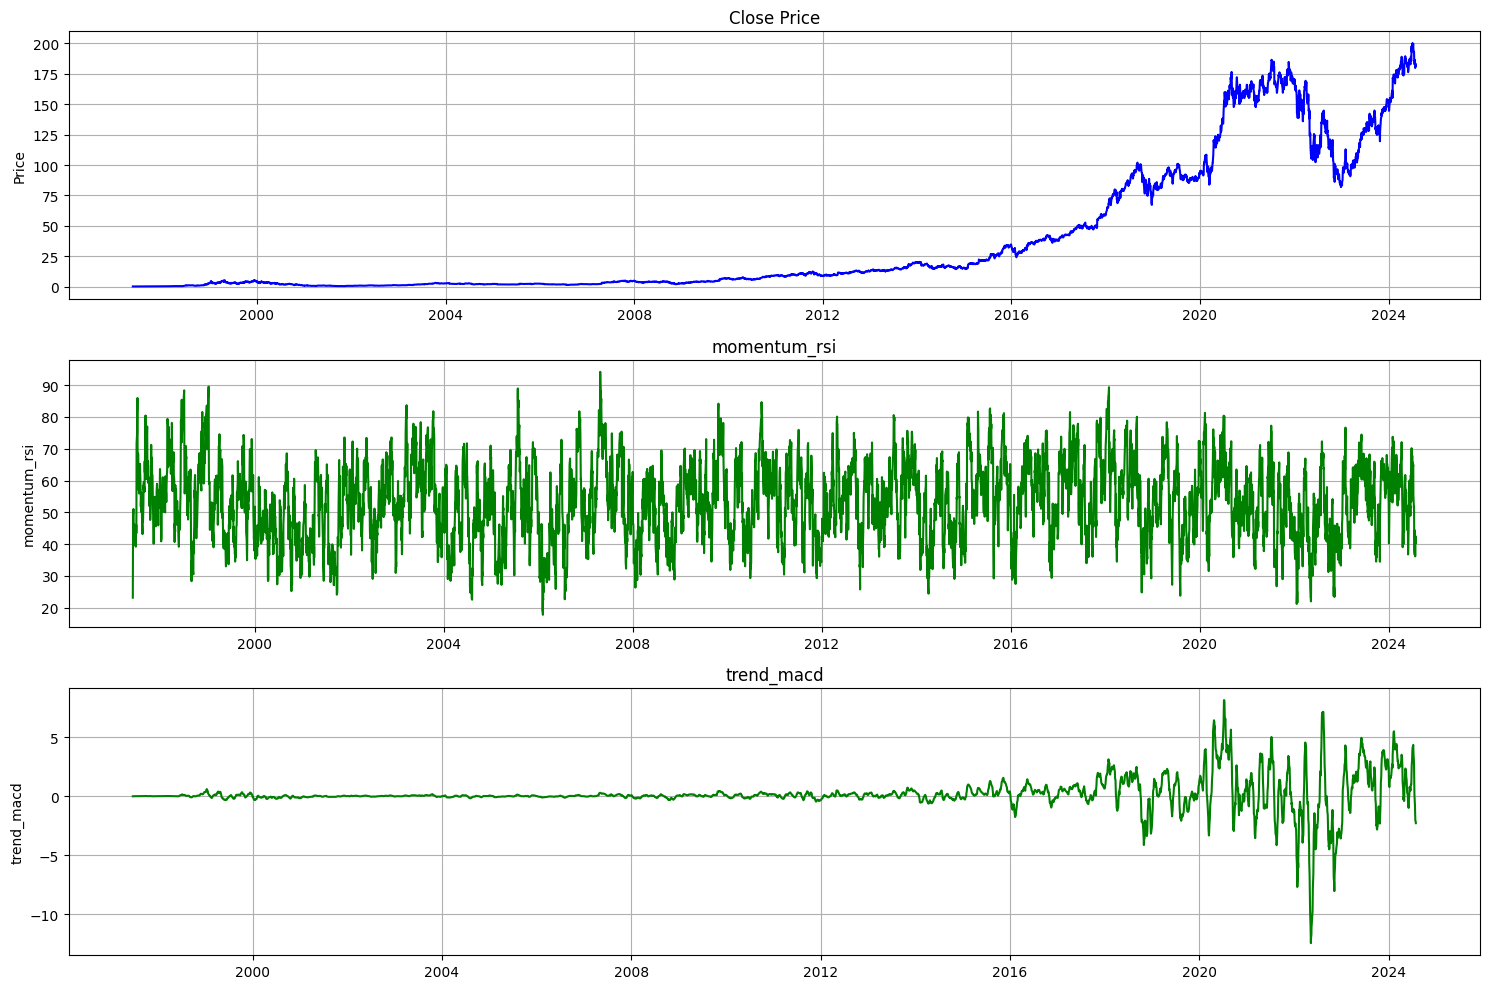

In [52]:
metrics = analyzer.compute_financial_metrics()
print(metrics)
analyzer.plot_price_and_indicators()